<a href="https://colab.research.google.com/github/Jpalmer95/Jpalmer95/blob/main/JPK_CV_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%%shell
jupyter nbconvert --to html /content/JPK_CV_Project_Full_Code_Notebook.ipynb

[NbConvertApp] Converting notebook /content/JPK_CV_Project_Full_Code_Notebook.ipynb to html
[NbConvertApp] Writing 925213 bytes to /content/JPK_CV_Project_Full_Code_Notebook.html


# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
import os


from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load the image file of the dataset # try unzipping first??
images = np.load('images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
images.shape

(4750, 128, 128, 3)

array([[[29, 38, 60],
        [28, 33, 52],
        [28, 33, 51],
        ...,
        [39, 53, 70],
        [45, 60, 76],
        [43, 57, 76]],

       [[26, 38, 60],
        [27, 33, 52],
        [21, 25, 45],
        ...,
        [45, 56, 74],
        [40, 58, 77],
        [35, 57, 82]],

       [[32, 45, 63],
        [24, 35, 53],
        [20, 32, 50],
        ...,
        [42, 56, 75],
        [36, 58, 78],
        [27, 58, 86]],

       ...,

       [[30, 38, 52],
        [22, 32, 48],
        [29, 43, 59],
        ...,
        [35, 48, 65],
        [37, 55, 73],
        [39, 60, 81]],

       [[39, 48, 58],
        [24, 35, 50],
        [44, 56, 70],
        ...,
        [41, 55, 72],
        [32, 54, 74],
        [30, 54, 81]],

       [[46, 53, 61],
        [33, 44, 59],
        [40, 49, 68],
        ...,
        [47, 65, 86],
        [36, 61, 88],
        [33, 61, 89]]], dtype=uint8)
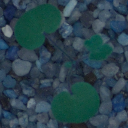

In [7]:
images[409]

In [8]:
labels.shape

(4750, 1)

In [9]:
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
*   The images appear to have different color filters placed over them as a data augmentation. This should help with preventing overfitting.
2. Is the dataset provided an imbalance? (Check with using bar plots)
*   Yes, the dataset does appear to be imbalanced as shown in the below barplot with the majority of the images being Small-flowered Cranesbill, Fat Hen, Shepherds Purse, Common Wheat, and Common Chickweed.



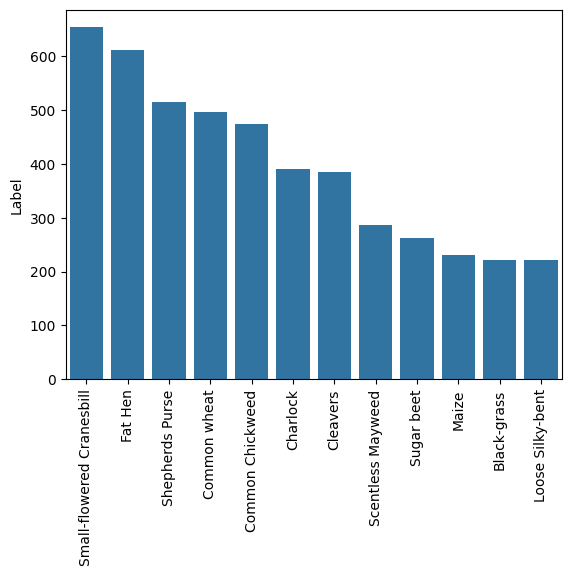

In [10]:
sns.barplot(x = labels['Label'].unique(), y = labels['Label'].value_counts())
plt.xticks(rotation=90)
plt.show()

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [11]:
# Converting images to RGB
BGR_images = []
for image in images:
  BGR_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
images = np.array(BGR_images)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [12]:
# Resizing the images to 64 pixels
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions))

# alternate method
# images = np.array([cv2.resize(image, (64, 64)) for image in images])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [13]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.array(images_decreased), labels['Label'], test_size=0.2, random_state=42)

# Further split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3040, 64, 64, 3) (3040,)
(760, 64, 64, 3) (760,)
(950, 64, 64, 3) (950,)


### Encode the target labels

In [15]:
# Encode the target labels

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)
encoded_Y_val = encoder.transform(y_val)

# Convert integers to dummy variables (i.e. one hot encoded)
y_train_cat = to_categorical(encoded_Y_train)
y_test_cat = to_categorical(encoded_Y_test)
y_val_cat = to_categorical(encoded_Y_val)

### Data Normalization

In [16]:
# Scale the pixel values
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Model Building

In [17]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [18]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [19]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Max pooling
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(16, activation='relu'))

# Using dropout
model.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()

# Compile model
model.compile(optimizer=opt, loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [20]:
train1 = model.fit(
            X_train, encoded_Y_train,
            epochs=30,
            validation_data=(X_val,encoded_Y_val),
            batch_size=32,
            verbose=2
)

Epoch 1/30
95/95 - 54s - loss: 2.4472 - accuracy: 0.1365 - val_loss: 2.3892 - val_accuracy: 0.2789 - 54s/epoch - 564ms/step
Epoch 2/30
95/95 - 37s - loss: 2.3475 - accuracy: 0.1809 - val_loss: 2.2403 - val_accuracy: 0.3211 - 37s/epoch - 385ms/step
Epoch 3/30
95/95 - 28s - loss: 2.2304 - accuracy: 0.2438 - val_loss: 2.1071 - val_accuracy: 0.3316 - 28s/epoch - 290ms/step
Epoch 4/30
95/95 - 27s - loss: 2.1573 - accuracy: 0.2612 - val_loss: 2.0207 - val_accuracy: 0.3342 - 27s/epoch - 287ms/step
Epoch 5/30
95/95 - 26s - loss: 2.1214 - accuracy: 0.2503 - val_loss: 1.9960 - val_accuracy: 0.3487 - 26s/epoch - 277ms/step
Epoch 6/30
95/95 - 27s - loss: 2.0957 - accuracy: 0.2720 - val_loss: 1.9595 - val_accuracy: 0.3526 - 27s/epoch - 284ms/step
Epoch 7/30
95/95 - 25s - loss: 2.0712 - accuracy: 0.2743 - val_loss: 1.9262 - val_accuracy: 0.3618 - 25s/epoch - 262ms/step
Epoch 8/30
95/95 - 25s - loss: 2.0766 - accuracy: 0.2734 - val_loss: 1.9948 - val_accuracy: 0.3592 - 25s/epoch - 268ms/step
Epoch 9/

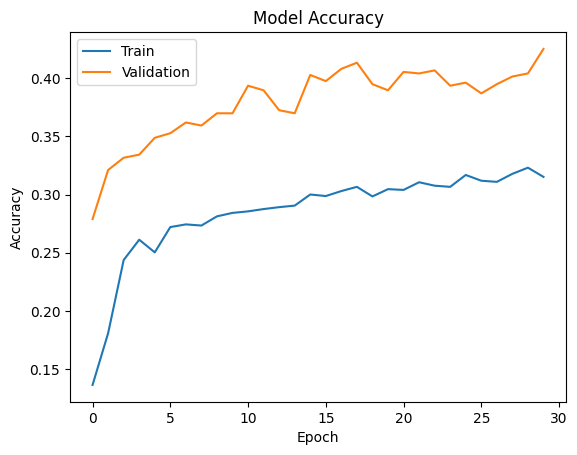

In [21]:
# Model Evaluation

plt.plot(train1.history['accuracy'])
plt.plot(train1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [22]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [23]:
# Using ReduceLRonPlateau() to reduce the learning rate

# Define the learning rate reduction callback
lr_callback = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.1,  # Reduce the learning rate by a factor of 0.1
    patience=2,  # Wait for 2 epochs without improvement
    min_lr=1e-5  # Set the minimum learning rate
)
# Train the model with the learning rate reduction callback
train2 = model.fit(
    X_train, encoded_Y_train,
    epochs=30,
    validation_data=(X_val, encoded_Y_val),
    batch_size=32,
    verbose=2,
    callbacks=[lr_callback]
)

Epoch 1/30
95/95 - 26s - loss: 1.9276 - accuracy: 0.3174 - val_loss: 1.8121 - val_accuracy: 0.3737 - lr: 0.0010 - 26s/epoch - 274ms/step
Epoch 2/30
95/95 - 27s - loss: 1.9210 - accuracy: 0.3191 - val_loss: 1.7383 - val_accuracy: 0.4118 - lr: 0.0010 - 27s/epoch - 287ms/step
Epoch 3/30
95/95 - 27s - loss: 1.8815 - accuracy: 0.3339 - val_loss: 1.7844 - val_accuracy: 0.4079 - lr: 0.0010 - 27s/epoch - 288ms/step
Epoch 4/30
95/95 - 26s - loss: 1.8796 - accuracy: 0.3273 - val_loss: 1.7056 - val_accuracy: 0.4171 - lr: 0.0010 - 26s/epoch - 278ms/step
Epoch 5/30
95/95 - 26s - loss: 1.9046 - accuracy: 0.3194 - val_loss: 1.6947 - val_accuracy: 0.4211 - lr: 0.0010 - 26s/epoch - 271ms/step
Epoch 6/30
95/95 - 27s - loss: 1.8943 - accuracy: 0.3283 - val_loss: 1.7568 - val_accuracy: 0.3882 - lr: 0.0010 - 27s/epoch - 280ms/step
Epoch 7/30
95/95 - 28s - loss: 1.8926 - accuracy: 0.3211 - val_loss: 1.6928 - val_accuracy: 0.4158 - lr: 0.0010 - 28s/epoch - 293ms/step
Epoch 8/30
95/95 - 26s - loss: 1.8927 - a

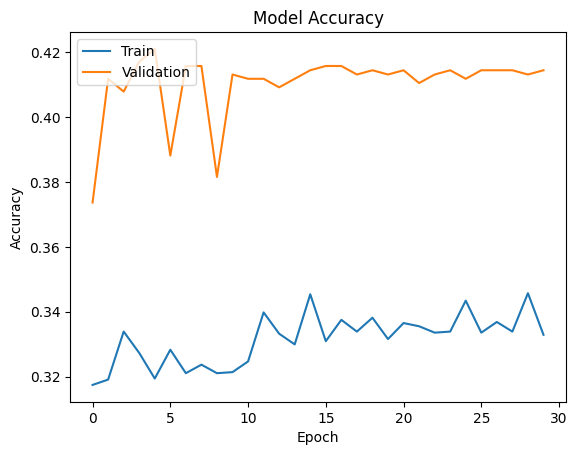

In [24]:
# Model 2 Evaluation

plt.plot(train2.history['accuracy'])
plt.plot(train2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [25]:
# Implement Horizontal Flip data augmentation on only the training data

# Creating an image augmentation object
datagen = ImageDataGenerator(horizontal_flip=True)

# Fit the augmentation object on the training data
datagen.fit(X_train)

# Train the model with the augmented training data
train3 = model.fit(
    datagen.flow(X_train, encoded_Y_train, batch_size=32),
    epochs=30,
    validation_data=(X_val, encoded_Y_val),
    verbose=2
)


Epoch 1/30
95/95 - 27s - loss: 1.9146 - accuracy: 0.3250 - val_loss: 1.7022 - val_accuracy: 0.4132 - 27s/epoch - 279ms/step
Epoch 2/30
95/95 - 27s - loss: 1.8783 - accuracy: 0.3332 - val_loss: 1.7029 - val_accuracy: 0.4132 - 27s/epoch - 281ms/step
Epoch 3/30
95/95 - 28s - loss: 1.8863 - accuracy: 0.3316 - val_loss: 1.7017 - val_accuracy: 0.4145 - 28s/epoch - 296ms/step
Epoch 4/30
95/95 - 27s - loss: 1.8990 - accuracy: 0.3257 - val_loss: 1.7030 - val_accuracy: 0.4132 - 27s/epoch - 281ms/step
Epoch 5/30
95/95 - 27s - loss: 1.9137 - accuracy: 0.3234 - val_loss: 1.7029 - val_accuracy: 0.4145 - 27s/epoch - 287ms/step
Epoch 6/30
95/95 - 31s - loss: 1.9174 - accuracy: 0.3191 - val_loss: 1.7055 - val_accuracy: 0.4105 - 31s/epoch - 331ms/step
Epoch 7/30
95/95 - 28s - loss: 1.8903 - accuracy: 0.3296 - val_loss: 1.7030 - val_accuracy: 0.4132 - 28s/epoch - 292ms/step
Epoch 8/30
95/95 - 28s - loss: 1.8985 - accuracy: 0.3303 - val_loss: 1.7037 - val_accuracy: 0.4118 - 28s/epoch - 290ms/step
Epoch 9/

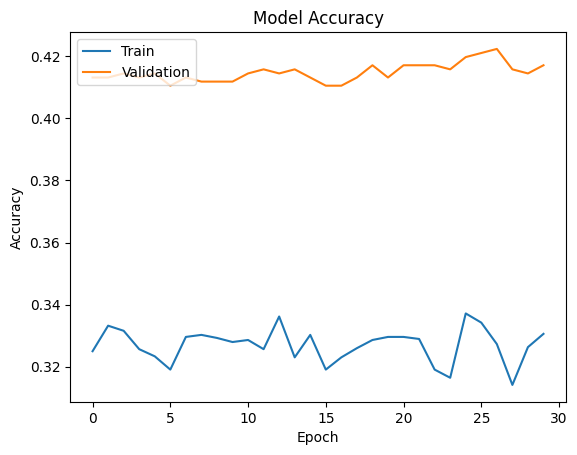

In [26]:
# Model 3 Evaluation

plt.plot(train3.history['accuracy'])
plt.plot(train3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [27]:
# Choose the best model based on the validation accuracy and loss
best_model = model

### Visualizing the prediction

1/1 [==============================] - 0s 170ms/step


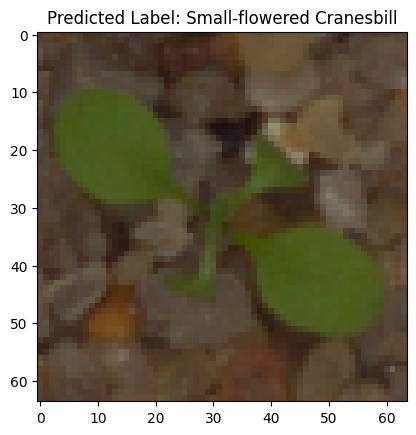

In [28]:
# Visualize the image prediction
plt.imshow(images_decreased[1009])
plt.title(f"Predicted Label: {encoder.classes_[np.argmax(best_model.predict(images_decreased[1009].reshape(1, 64, 64, 3)))]}")
plt.show()

## Actionable Insights and Business Recommendations

*   Use the AI generated plant seedlings classifications to quickly group unknown plant seedlings into their respective categories so that autonomous farming equipment can quickly identify and care for each different type of plant without additional human labor, or incorrect tending to the plants.
*   Utilize a high quality drone to scan and identify regions of different plants, classify them, and then update watering, harvesting or other farming practices as needed.
*   Considering the current accuracy of the plant classification model, I recommend continuing to trial various data augmentation steps and alternate model tuning to optimize the identification as we scale up the number of plants it is able to classify.
*   Finally, I recommend training a model that can also keep track of farming equipment, as well as one that checks for various defects and diseases across the plants. All of these should be connected to an easy to access site or app that you can easily manage from your device of choice. Farming made easy!



_____